In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import os

In [5]:
city_len = 5
ex_flg = False

h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
pop_path = f'{h08dir}/global_city/dat/pop_tot_/GPW4ag__20100000.gl5'
pop = np.fromfile(pop_path, dtype='float32').reshape(2160, 4320)
riv_path = f'{h08dir}/wsi/dat/riv_out_/W5E5LR__00000000.gl5'
rivout = np.fromfile(riv_path, dtype='float32').reshape(2160, 4320)
msk_dir = f'{h08dir}/global_city/dat/vld_cty_'
cnt_dir = f'{h08dir}/global_city/dat/cty_cnt_/gpw4'
prf_dir = f'{h08dir}/global_city/dat/cty_prf_'

lonlat_path = f'{h08dir}/global_city/dat/cty_lst_/gpw4/WUP2018_300k_2010.txt'
with open(lonlat_path, "r") as input_file:
    lines = input_file.readlines()

LPD = []

for i in range(city_len):
    city_num = i+1
    msk_path = f'{msk_dir}/city_{city_num:08}.gl5'
    prf_path = f'{prf_dir}/vld_cty_/city_{city_num:08}.gl5'
    
    if not os.path.exists(prf_path):
        print(f'{i+1} is invalid prf')
        
    else:
        msk = np.fromfile(msk_path, dtype='float32').reshape(2160, 4320)
        pop_msk = np.ma.masked_where(msk != 1, pop)
        pop_sum = np.sum(pop_msk)
        prf = np.fromfile(prf_path, dtype='float32').reshape(2160, 4320)
        supply = np.ma.masked_where(msk != 1, rivout)
        supply_sum = np.sum(supply) * 60 * 60 * 24
        
        line = lines[i]
        parts = line.split('\t')
        parts = [item.strip() for item in parts]
        cnt_lat = float(parts[1])
        cnt_lon = float(parts[2])
        city_name = parts[4].replace("\"", "").replace("?", "").replace("/", "")
        
        lpd = supply_sum/pop_sum
        LPD.append([cnt_lon, cnt_lat, lpd])
        
        print(city_num, lpd)

if ex_flg is True:
    lpd_array = np.array(LPD)
    savepath = f'{h08dir}/wsi/dat/lpd/lpd_citylonlat.npy'
    np.save(savepath, lpd_array)

1 8588.732509266432
2 18908.299418612558
3 12513.683044681136
4 1392.8924279292896
5 4127.313488372093


In [7]:
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
savepath = f'{h08dir}/wsi/dat/lpd/lpd_citylonlat.npy'
tmp = np.load(savepath)
print(tmp[2].shape)

(3,)


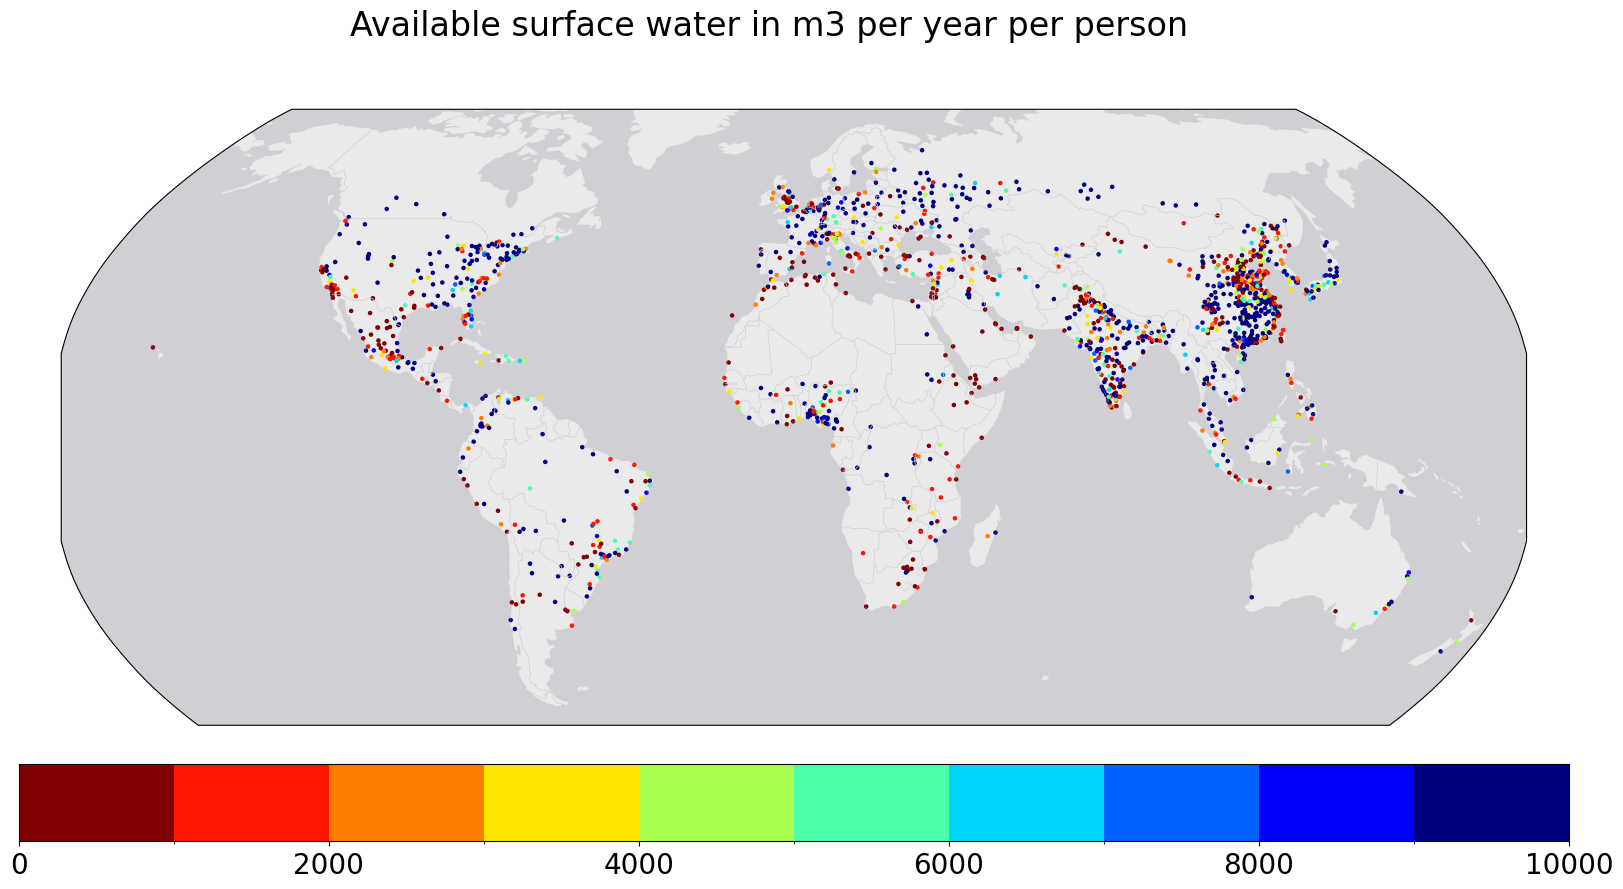

In [8]:
import matplotlib.colors as mcolors

cmap = plt.get_cmap('jet_r', 10)  # 10個の離散値
bounds = np.linspace(0, 1e4, 11)  # 0から100までの範囲を10分割
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 20
projection = ccrs.Robinson(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
ax.set_extent([-180, 180, -60, 75], crs=crs)
img = ax.scatter(
              tmp[:, 0], 
              tmp[:, 1], 
              c=tmp[:, 2]*365/1000, 
              s=5, 
              cmap= cmap,
              norm = norm,
              transform=ccrs.PlateCarree(), 
             )
#ax.gridlines()
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Available surface water in m3 per year per person')
plt.show()

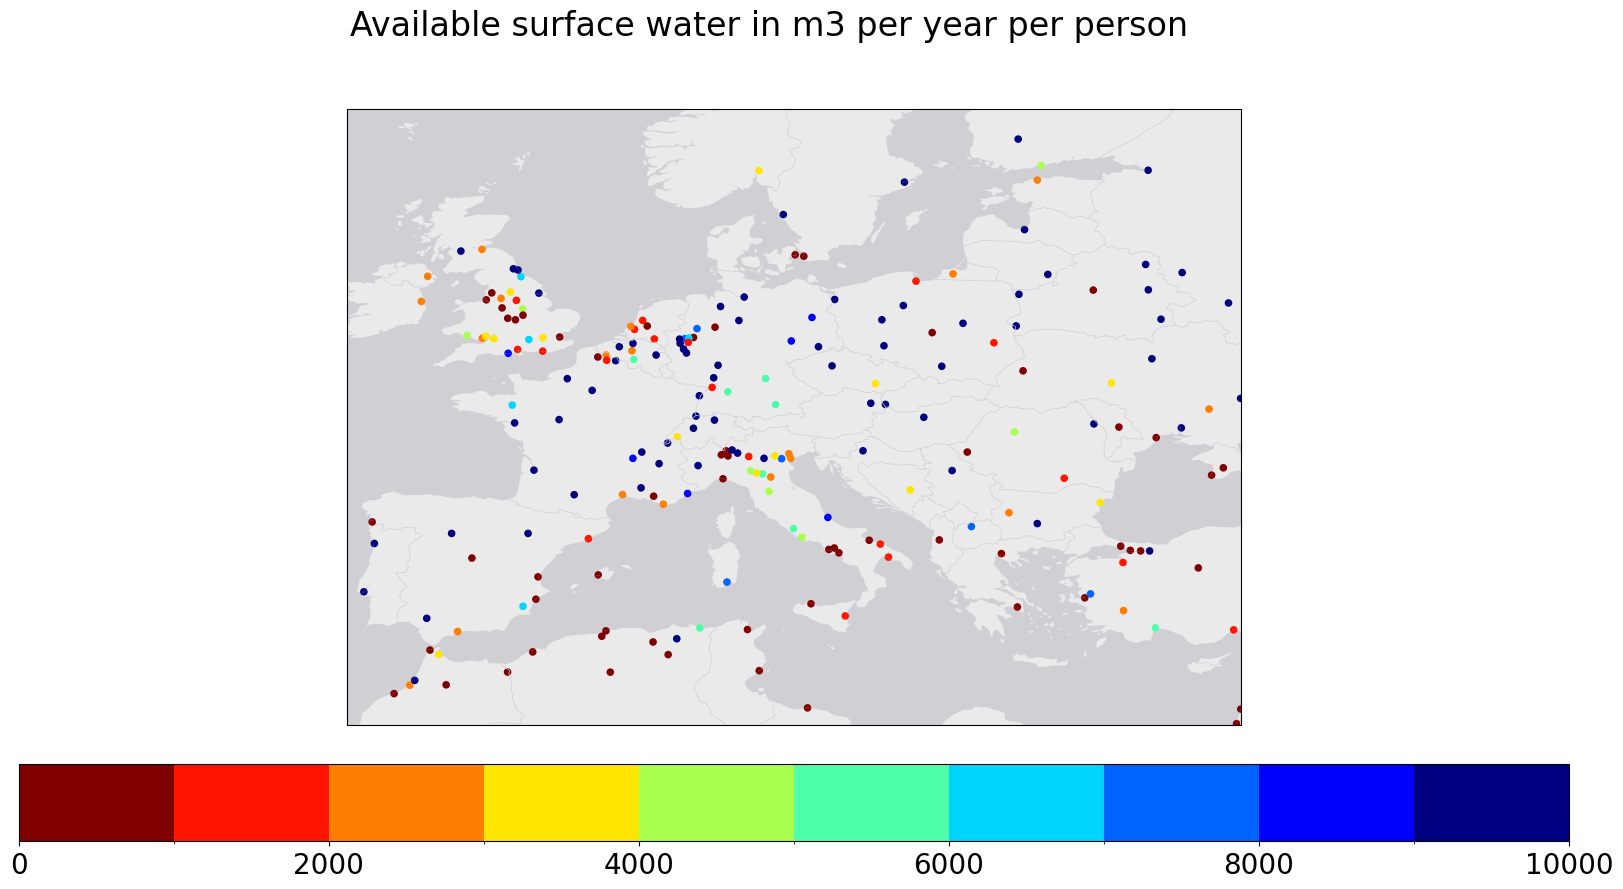

In [9]:
import matplotlib.colors as mcolors

cmap = plt.get_cmap('jet_r', 10)  # 10個の離散値
bounds = np.linspace(0, 1e4, 11)  # 0から100までの範囲を10分割
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 20
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
ax.set_extent([-10, 35, 32, 63], crs=crs)
img = ax.scatter(
              tmp[:, 0], 
              tmp[:, 1], 
              c=tmp[:, 2]*365/1000, 
              s=20, 
              cmap= cmap,
              norm = norm,
              transform=ccrs.PlateCarree(), 
             )
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Available surface water in m3 per year per person')
plt.show()

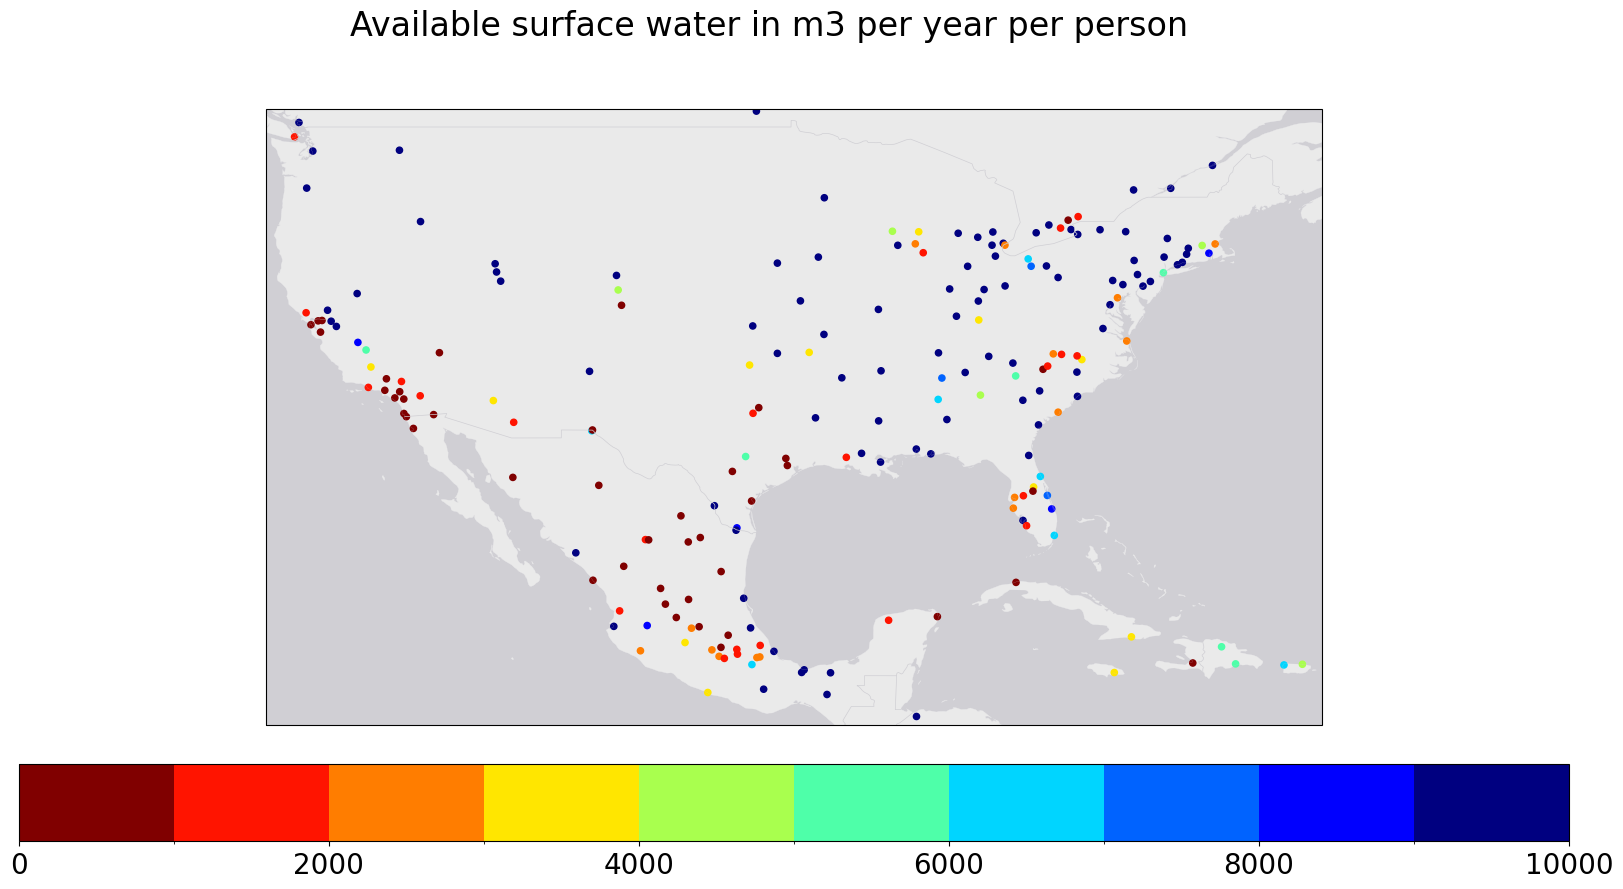

In [10]:
import matplotlib.colors as mcolors

cmap = plt.get_cmap('jet_r', 10)  # 10個の離散値
bounds = np.linspace(0, 1e4, 11)  # 0から100までの範囲を10分割
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 20
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
ax.set_extent([-125, -65, 15, 50], crs=crs)
img = ax.scatter(
              tmp[:, 0], 
              tmp[:, 1], 
              c=tmp[:, 2]*365/1000, 
              s=20, 
              cmap= cmap,
              norm = norm,
              transform=ccrs.PlateCarree(), 
             )
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Available surface water in m3 per year per person')
plt.show()

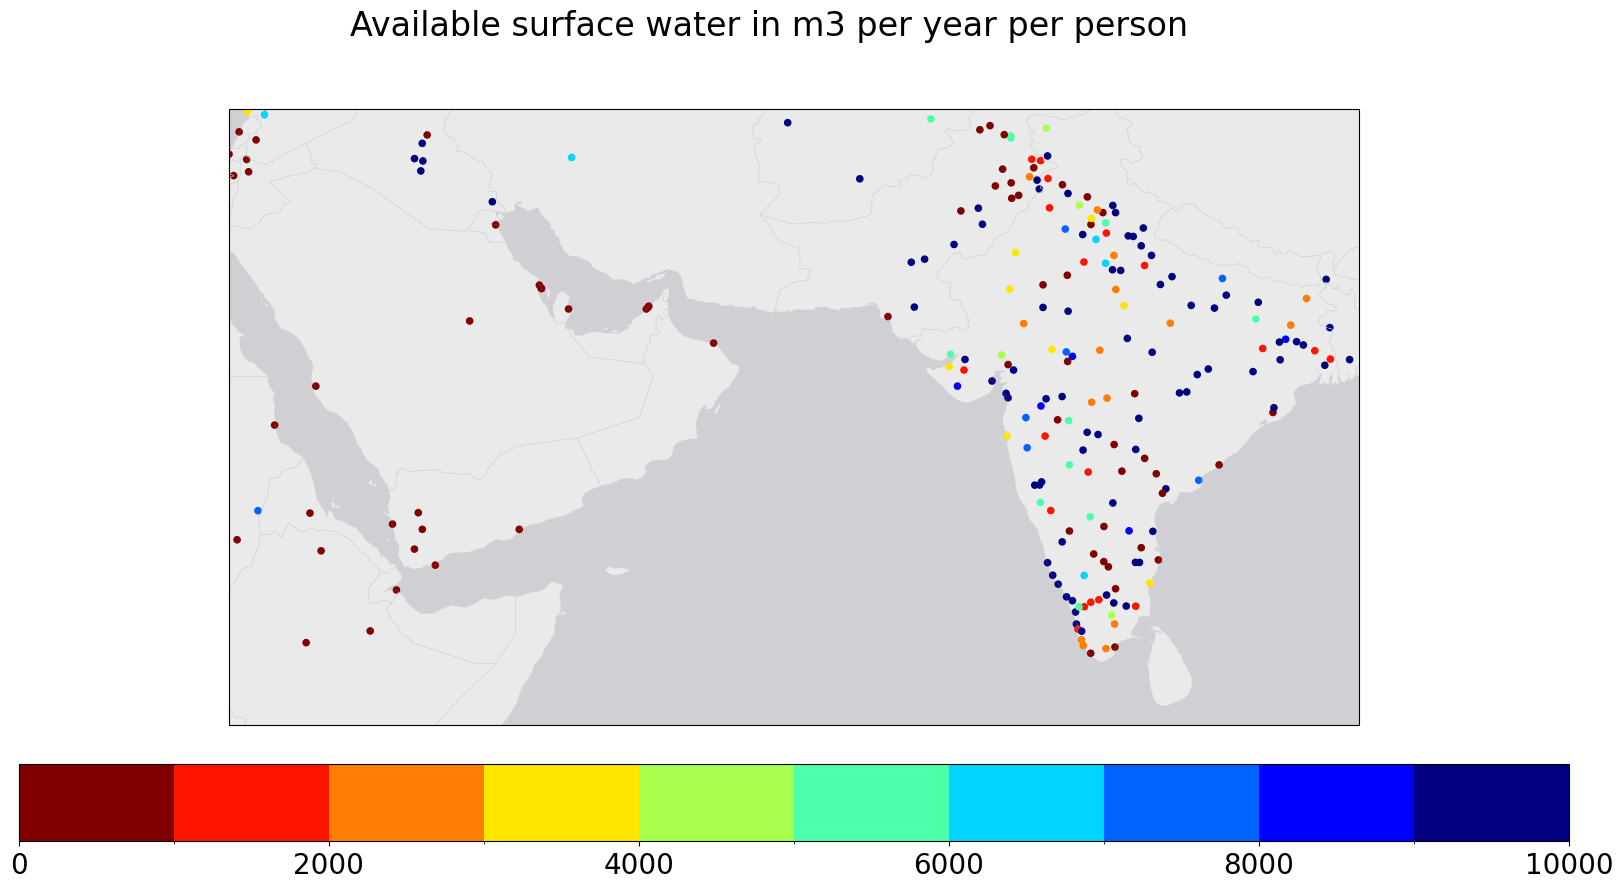

In [11]:
import matplotlib.colors as mcolors

cmap = plt.get_cmap('jet_r', 10)  # 10個の離散値
bounds = np.linspace(0, 1e4, 11)  # 0から100までの範囲を10分割
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 20
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
ax.set_extent([35, 90, 5, 35], crs=crs)
img = ax.scatter(
              tmp[:, 0], 
              tmp[:, 1], 
              c=tmp[:, 2]*365/1000, 
              s=20, 
              cmap= cmap,
              norm = norm,
              transform=ccrs.PlateCarree(), 
             )
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Available surface water in m3 per year per person')
plt.show()

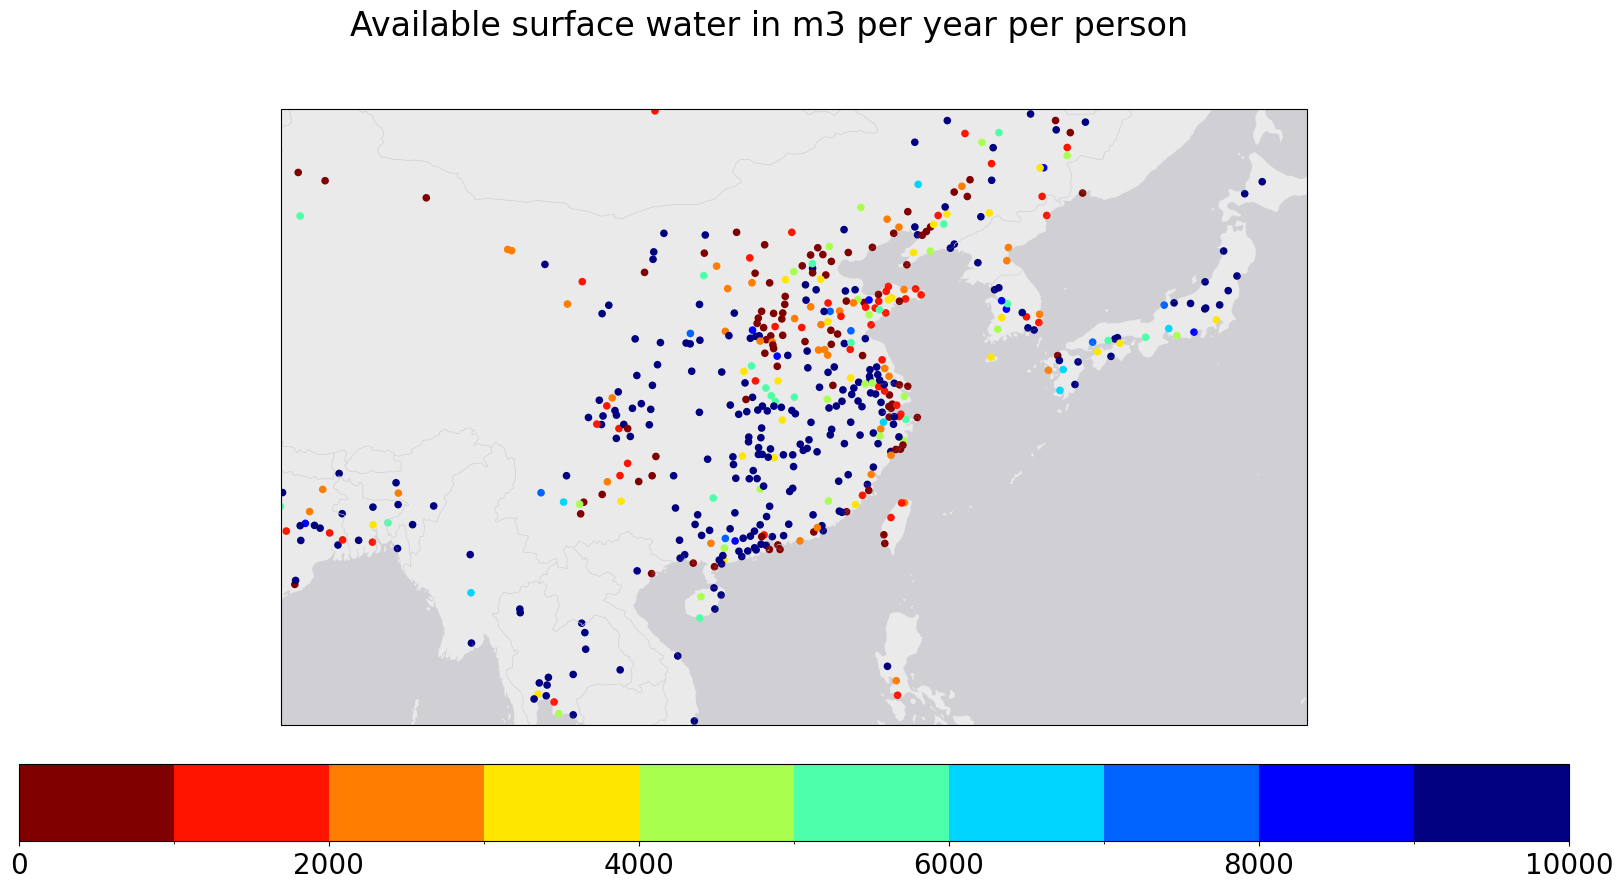

In [12]:
import matplotlib.colors as mcolors

cmap = plt.get_cmap('jet_r', 10)  # 10個の離散値
bounds = np.linspace(0, 1e4, 11)  # 0から100までの範囲を10分割
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 20
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
ax.set_extent([85, 145, 12, 48], crs=crs)
img = ax.scatter(
              tmp[:, 0], 
              tmp[:, 1], 
              c=tmp[:, 2]*365/1000, 
              s=20, 
              cmap= cmap,
              norm = norm,
              transform=ccrs.PlateCarree(), 
             )
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Available surface water in m3 per year per person')
plt.show()